In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)


# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]


def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def loss_function(h, y):
    h_scale = (h + 1)/2
    return (-y * np.log(h_scale) - (1 - y) * np.log(1 - h_scale)).mean()

def predict(X, theta):    
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat-y)*(1+y_hat)/y_hat) / y.size


lr=0.1
num_iter=700

theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    # update weight
    theta -= lr*gradient    

    # for debug
    if(i%1 == 0):
        # loss
        losses.append(loss)
        
        # accuracy for training
        preds = predict(X, theta).round()/2 + 0.5
        acc = (preds == y).mean()
        accs.append(acc)        

# show figures
plt.plot(losses)
plt.show()

<Figure size 640x480 with 1 Axes>

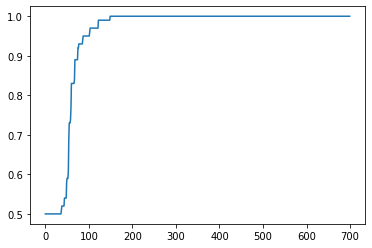

In [5]:
plt.plot(accs)
plt.show()

In [4]:
preds = predict(X, theta).round()/2 + 0.5
print(preds)
print(y)

[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0.]
[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0.]
